### Notebook description

for this notebook, use a ss soil cover in dynamic equilibrium

Import the modules used in this notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from autograd import grad
import autograd.numpy as np # automatic differentiation library
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit

## PART I
### Creating a model hillslope

In [3]:
def f(x):
    return 1/(1 + np.exp(-x))

In [4]:
x = np.linspace(0,5,20)
sap = (f(x)*1000)
ss_surf = (f(x)+0.2)*1000

In [5]:
f1 = grad(f) # 1st derivative
f2 = grad(f1) # 2nd derivative

In [6]:
def curvature(x):
    return abs(f2(x))*(1 + f1(x)**2)**-1.5

In [7]:
c = [curvature(t) for t in x]
c = np.array(c)

In [41]:
mu, sigma = 0, 0.005 
s1 = np.random.normal(mu, sigma, 20)
s2 = np.random.normal(mu, sigma, 20)
s3 = np.random.normal(mu, sigma, 20)

In [42]:
h1_curv1 = ((f(x) + f(x)*-c**2+s1)*1.2)*1000

In [43]:
h2_curv1 = ((f(x) + f(x)*-c**2+s2)*1.15)*1000

In [44]:
h3_curv1 = ((f(x) + f(x)*-c**2+s3)*1.1)*1000

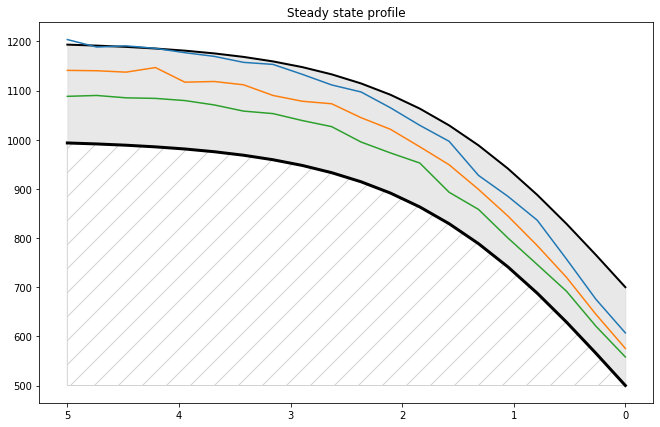

In [45]:
fig, ax = plt.subplots(figsize=(11,7))

# Plot initial conditions -------------------------------------------------
ax.plot(x, sap, color='k', linewidth=3) # soil-saprolite interface
ax.fill_between(x, 500, sap, facecolor='white', hatch='/', edgecolor='lightgrey') # color in bedrock


ax.plot(x, ss_surf, color='k', linewidth=2) # sub-aerial soil interface
ax.fill_between(x, sap, ss_surf, alpha=0.5, color='lightgrey') # color in soil

ax.plot(x, h1_curv1)
ax.plot(x, h2_curv1)
ax.plot(x, h3_curv1)

ax.invert_xaxis()
#ax.set_axis_off()
ax.set_title('Steady state profile')
plt.show()

In [46]:
sz = zip(x, sap, ss_surf-sap, h1_curv1-sap, h2_curv1-sap, h3_curv1-sap)
ss = pd.DataFrame(data=sz, columns=['x', 'sap', 'ss', 'h1', 'h2', 'h3'])

In [47]:
def p_rate(i):
    return 9.8 * np.exp(-i*1.6/165)

In [48]:
ss['ss_p'] = ss['ss'].apply(p_rate)
ss['h1_p'] = ss['h1'].apply(p_rate)
ss['h2_p'] = ss['h2'].apply(p_rate)
ss['h3_p'] = ss['h3'].apply(p_rate)

Calculate the nuclide concentration at depth $z$ from **equation 2**:
### $C_z = P_z  \left( \frac{1}{\lambda + \frac{\rho \in}{\Lambda}} \right)$

#### Constants:

$\lambda$ = $^{10}$Be decay constant = approximated as 0 for this simulation

$\in$ = Erosion rate = 1 [cm yr-1] for this simulation

In [49]:
def c_z(p):
    return p/(1.6/165)

In [50]:
ss['ss_c'] = ss['ss_p'].apply(c_z)
ss

,x,sap,ss,h1,h2,h3,ss_p,h1_p,h2_p,h3_p,ss_c
0,0.000000,500.000000,200.0,107.033509,75.414815,58.045796,1.409152,3.471135,4.716595,5.581815,145.31885
1,0.263158,565.412413,200.0,109.767367,79.218718,55.063544,1.409152,3.380324,4.545787,5.745592,145.31885
2,0.526316,628.623419,200.0,128.193656,91.107054,62.882224,1.409152,2.827216,4.050823,5.326079,145.31885
3,0.789474,687.718309,200.0,148.424013,96.850025,58.320365,1.409152,2.323604,3.831401,5.566974,145.31885
4,1.052632,741.279914,200.0,143.496249,103.507788,58.841410,1.409152,2.437331,3.591861,5.538917,145.31885
5,1.315789,788.480332,200.0,138.821077,110.396432,69.664169,1.409152,2.550370,3.359767,4.987082,145.31885
6,1.578947,829.055388,200.0,167.574221,119.896245,63.955287,1.409152,1.929807,3.064095,5.270946,145.31885
7,1.842105,863.197503,200.0,165.975584,122.405115,89.305553,1.409152,1.959956,2.990449,4.122209,145.31885
8,2.105263,891.413678,200.0,173.514842,129.754955,81.675373,1.409152,1.821780,2.784734,4.438776,145.31885
9,2.368421,914.387336,200.0,182.642801,130.350968,80.853244,1.409152,1.667459,2.768686,4.474305,145.31885


In [51]:
cz = 145.31885

Calculate the apparent erosion rate from $C_z$ using **equation 3**:

### $E_z = \left( \frac {\Lambda}{\rho} \right) \left( \frac{P_z}{C_z} \right)$

In [52]:
ss['ss_spr'] = (165/1.6) *(ss['ss_p']/cz)
ss['h1_spr'] = (165/1.6) *(ss['h1_p']/cz)
ss['h2_spr'] = (165/1.6) *(ss['h2_p']/cz)
ss['h3_spr'] = (165/1.6) *(ss['h3_p']/cz)

In [53]:
def fit(x, a, k):
    return a* np.exp(-k *x)

### Steady state soil production as initial condition:

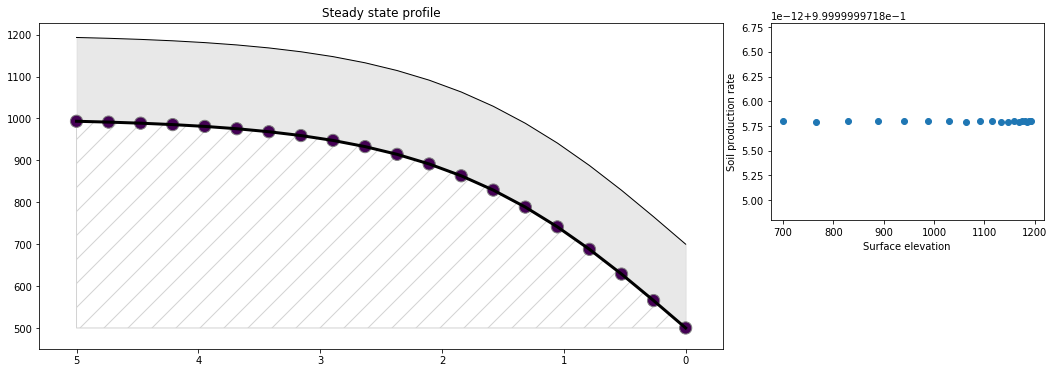

In [54]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(2,2, height_ratios=(1, 0.5), width_ratios=(2.5,1), wspace=0.1)
ax = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])

ax.plot(x, sap, color='k', linewidth=3) # soil-saprolite interface
ax.fill_between(x, 500, sap, facecolor='white', hatch='/', edgecolor='lightgrey') # color in bedrock


ax.plot(x, ss_surf, color='k', linewidth=1) # sub-aerial soil interface
ax.fill_between(x, sap, ss_surf, alpha=0.5, color='lightgrey') # color in soil

# Scatter plot of soil production rates ---------------------------------------

ax.scatter(x, sap, c=ss['ss_spr'].astype(int), s=150, edgecolor='grey')

# Plot params ---------------------------------------------------------------------

ax.invert_xaxis()
#ax.set_axis_off()
ax.set_title('Steady state profile')

# SPF plot ---------------------------------------------------------------------

ax1.plot(sap+ss['ss'], ss['ss_spr'], marker='o', linestyle='')

ax1.set_xlabel('Surface elevation')
ax1.set_ylabel('Soil production rate')

plt.show()

### Surface soil removed, new soil mantle f(curv1):

In [55]:
h1_popt, h1_pcov = curve_fit(fit, ss['h1'], ss['h1_spr'], p0=(200,-0.01))
print ("curve fit parameters a, k:", h1_popt)

curve fit parameters a, k: [6.9545348  0.00969697]


In [56]:
h1_fit = 'SPF = $6.95e^{-0.009h}$'

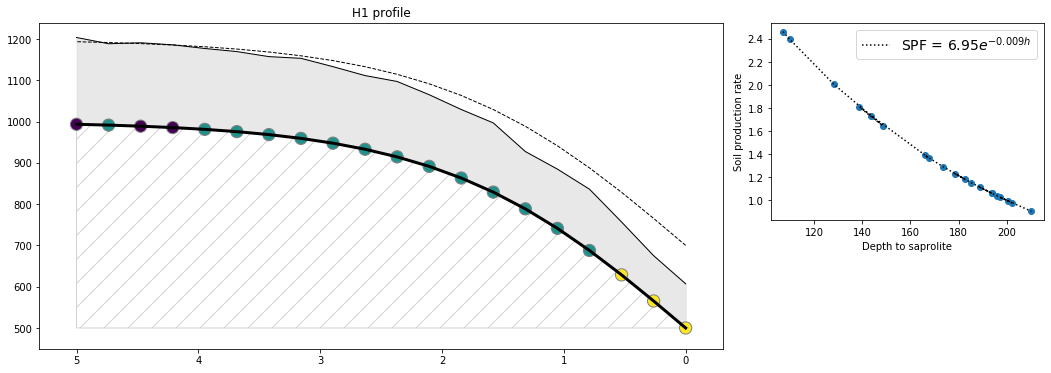

In [57]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(2,2, height_ratios=(1, 0.5), width_ratios=(2.5,1), wspace=0.1)
ax = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])

ax.plot(x, sap, color='k', linewidth=3) # soil-saprolite interface
ax.fill_between(x, 500, sap, facecolor='white', hatch='/', edgecolor='lightgrey') # color in bedrock


ax.plot(x, ss_surf, color='k', linewidth=1, linestyle='--') # FORMER sub-aerial soil interface

ax.plot(x, h1_curv1, color='k', linewidth=1) # NEW sub-aerial soil interface
ax.fill_between(x, sap, h1_curv1, alpha=0.5, color='lightgrey') # color in soil

# Scatter plot of soil production rates ---------------------------------------

ax.scatter(x, sap, c=ss['h1_spr'].astype(int), s=150, edgecolor='grey')

# Plot params ---------------------------------------------------------------------

ax.invert_xaxis()
#ax.set_axis_off()
ax.set_title('H1 profile')

# SPF plot ---------------------------------------------------------------------

ax1.plot(ss['h1'], ss['h1_spr'], marker='o', linestyle='')
ax1.plot(ss['h1'], fit(ss['h1'], *h1_popt), 'k:', label=h1_fit)

ax1.set_xlabel('Depth to saprolite')
ax1.set_ylabel('Soil production rate')
ax1.legend(fontsize=14)

plt.show()

### Surface soil removed, new soil mantle f(curv2):

In [58]:
h2_popt, h2_pcov = curve_fit(fit, ss['h2'], ss['h2_spr'], p0=(200,-0.01))
print ("curve fit parameters a, k:", h2_popt)

curve fit parameters a, k: [6.9545348  0.00969697]


In [59]:
h2_fit = 'SPF = $6.95e^{-0.009h}$'

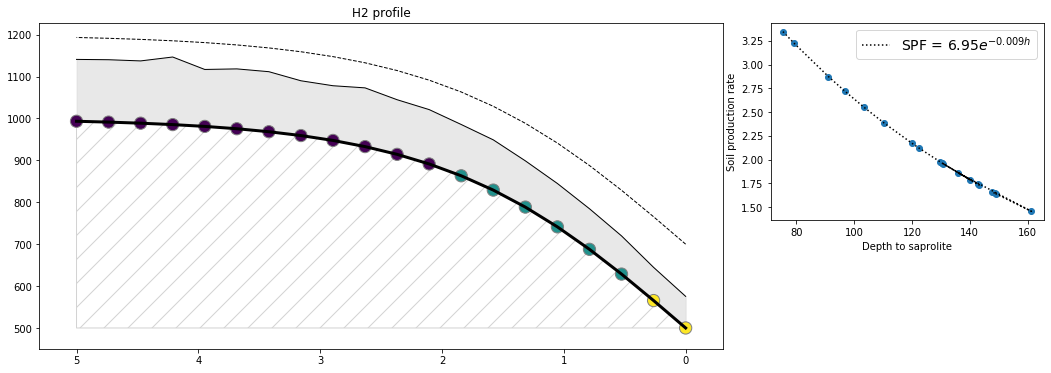

In [60]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(2,2, height_ratios=(1, 0.5), width_ratios=(2.5,1), wspace=0.1)
ax = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])

ax.plot(x, sap, color='k', linewidth=3) # soil-saprolite interface
ax.fill_between(x, 500, sap, facecolor='white', hatch='/', edgecolor='lightgrey') # color in bedrock


ax.plot(x, ss_surf, color='k', linewidth=1, linestyle='--') # FORMER sub-aerial soil interface

ax.plot(x, h2_curv1, color='k', linewidth=1) # NEW sub-aerial soil interface
ax.fill_between(x, sap, h2_curv1, alpha=0.5, color='lightgrey') # color in soil

# Scatter plot of soil production rates ---------------------------------------

ax.scatter(x, sap, c=ss['h2_spr'].astype(int), s=150, edgecolor='grey')

# Plot params ---------------------------------------------------------------------

ax.invert_xaxis()
#ax.set_axis_off()
ax.set_title('H2 profile')

# SPF plot ---------------------------------------------------------------------

ax1.plot(ss['h2'], ss['h2_spr'], marker='o', linestyle='')
ax1.plot(ss['h2'], fit(ss['h2'], *h2_popt), 'k:', label=h2_fit)

ax1.set_xlabel('Depth to saprolite')
ax1.set_ylabel('Soil production rate')
ax1.legend(fontsize=14)

plt.show()

### Surface soil removed, new soil mantle f(curv3):

In [61]:
h3_popt, h3_pcov = curve_fit(fit, ss['h3'], ss['h3_spr'], p0=(200,-0.01))
print ("curve fit parameters a, k:", h3_popt)

curve fit parameters a, k: [6.9545348  0.00969697]


In [62]:
h3_fit = 'SPF = $6.95e^{-0.009h}$'

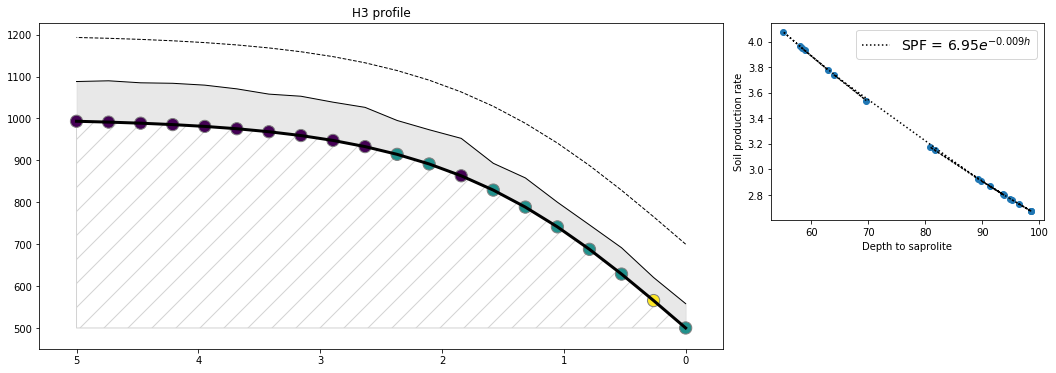

In [63]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(2,2, height_ratios=(1, 0.5), width_ratios=(2.5,1), wspace=0.1)
ax = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])

ax.plot(x, sap, color='k', linewidth=3) # soil-saprolite interface
ax.fill_between(x, 500, sap, facecolor='white', hatch='/', edgecolor='lightgrey') # color in bedrock


ax.plot(x, ss_surf, color='k', linewidth=1, linestyle='--') # FORMER sub-aerial soil interface

ax.plot(x, h3_curv1, color='k', linewidth=1) # NEW sub-aerial soil interface
ax.fill_between(x, sap, h3_curv1, alpha=0.5, color='lightgrey') # color in soil

# Scatter plot of soil production rates ---------------------------------------

ax.scatter(x, sap, c=ss['h3_spr'].astype(int), s=150, edgecolor='grey')

# Plot params ---------------------------------------------------------------------

ax.invert_xaxis()
#ax.set_axis_off()
ax.set_title('H3 profile')

# SPF plot ---------------------------------------------------------------------

ax1.plot(ss['h3'], ss['h3_spr'], marker='o', linestyle='')
ax1.plot(ss['h3'], fit(ss['h3'], *h3_popt), 'k:', label=h3_fit)

ax1.set_xlabel('Depth to saprolite')
ax1.set_ylabel('Soil production rate')
ax1.legend(fontsize=14)

plt.show()

### SPF plot for H1-H3

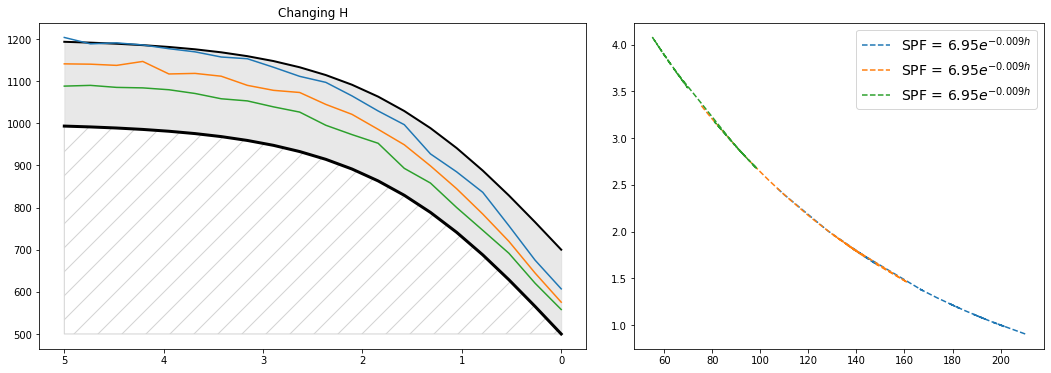

In [64]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(2,2, height_ratios=(1, 0.5), width_ratios=(1,0.75), wspace=0.1)
ax = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[:,1])

# Plot initial conditions -------------------------------------------------
ax.plot(x, sap, color='k', linewidth=3) # soil-saprolite interface
ax.fill_between(x, 500, sap, facecolor='white', hatch='/', edgecolor='lightgrey') # color in bedrock

ax.plot(x, ss_surf, color='k', linewidth=2) # sub-aerial soil interface
ax.fill_between(x, sap, ss_surf, alpha=0.5, color='lightgrey') # color in soil

ax.plot(x, h1_curv1)
ax.plot(x, h2_curv1)
ax.plot(x, h3_curv1)

ax.invert_xaxis()
#ax.set_axis_off()
ax.set_title('Changing H')

# SPF plot ---------------------------------------------------------------------

ax1.plot(ss['h1'], fit(ss['h1'], *h1_popt), '--', label=h1_fit)
ax1.plot(ss['h2'], fit(ss['h2'], *h2_popt), '--', label=h2_fit)
ax1.plot(ss['h3'], fit(ss['h3'], *h3_popt), '--', label=h3_fit)

ax1.legend(fontsize=14)

plt.show()